<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_2/c_10/c_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# [Chapter 10 – Introduction to Artificial Neural Networks with Keras](https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb)

Este cuaderno contiene todo el código de muestra y las soluciones a los ejercicios del capítulo 10.

## Setup

Primero, importemos algunos módulos comunes, asegurémonos de que MatplotLib trace figuras en línea y prepare una función para guardar las figuras. 

También verificamos que Python 3.5 o posterior esté instalado (aunque Python 2.x puede funcionar, está obsoleto, por lo que le recomendamos que use Python 3 en su lugar), así como Scikit-Learn $\geq 0.20$ y TensorFlow $\geq 2.0$ ps

# Módulo sys de Python

El módulo sys en Python proporciona varias funciones y variables que se utilizan para manipular diferentes partes del entorno de tiempo de ejecución de Python. 

Permite operar sobre el intérprete ya que proporciona acceso a las variables y funciones que interactúan fuertemente con el intérprete. Consideremos el siguiente ejemplo.

In [1]:
# python >= 3.5 es requerido 

import sys 

assert sys.version_info >= (3,5) 

In [2]:
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [2]:
# sklearn >= 0.20 es requerido 

import sklearn 
assert sklearn.__version__ >= '0.20' 


In [3]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [4]:
# tensoflow >= 2.0 es requerido
import tensorflow as tf
assert tf.__version__ >= '2.0'

In [5]:
import numpy as np 
import os 

In [6]:
# para hacer que la salida de este portátil sea estable a lo largo de las ejecuciones

np.random.seed(42) 

In [11]:
# para trazar gráficos bonitos
%matplotlib inline 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12) 

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Perceptrons

### Nota:   

configuramos `max_iter` y `tol` explícitamente para evitar advertencias sobre el hecho de que su valor predeterminado cambiará en futuras versiones de Scikit-Learn.

In [19]:
import numpy as np 
from sklearn.datasets import load_iris 
from sklearn.linear_model import Perceptron  

iris = load_iris() 
X = iris.data[:,(2,3)]  # petal lenght, petal width 
y = (iris.target == 0).astype(np.int64)

per_clf = Perceptron(max_iter = 1000, tol = 1e-3, random_state = 42) 
per_clf.fit(X,y) 

y_pred = per_clf.predict([[2,0.5]]) 
y_pred 

array([1], dtype=int64)

(0.0, 5.0, 0.0, 2.0)

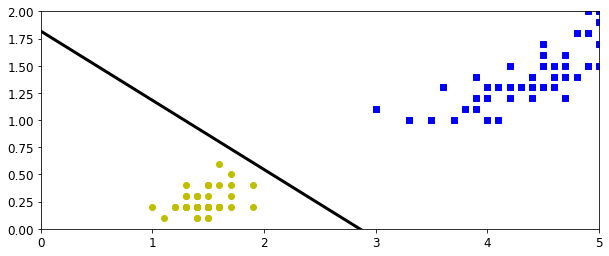

In [30]:
a = -per_clf.coef_[0][0]/per_clf.coef_[0][1] 
b = -per_clf.intercept_/per_clf.coef_[0][1] 

axes = [0,5,0,2] 

x0,x1 = np.meshgrid(np.linspace(axes[0], axes[1], 500).reshape(-1,1), 
                   np.linspace(axes[1], axes[2], 200).reshape(-1,1)) 

x_new = np.c_[x0.ravel(), x1.ravel()] 

y_predict = per_clf.predict(x_new) 

zz = y_predict.reshape(x0.shape)

plt.figure(figsize = (10,4))

plt.plot(X[y == 0, 0], X[y==0, 1], 'bs', label = 'Not iris - setosa')

plt.plot(X[y==1, 0], X[y==1, 1], 'yo', label = 'iris - setosa')

plt.plot([axes[0], axes[1]], [a*axes[0]+b, a*axes[1]+b], 'k-', linewidth = 3)



plt.axis(axes) 
